# Clasificación

Nos encontraremos que en muchos casos nuestro interés no es el de predecir un número continuo sino una variable categórica:

* Es un cliente objetivo o no
* Está enfermo o no
* A qué grupo pertenece

Esencialmente la clasificación requiere que etiquetemos nuestras muestras en una categoría y otra. Existen dos grande grupos de problemas en este ámbito:

* Clasificación binaria, donde la categoría a predecir es binaria (SI o NO)
* Clasificación multi-clase, donde la respuesta se presenta como una etiqueta perteneciente a una u otra categoría.

Un problema multi-clase se puede tratar empleando multiples clasificadores binarios centrados en detectar una de las categorías, de manera que cuando veamos la construcción de modelos agrupados esto resultará más relevante. Por este motivo emplearemos muchos de los ejemplos centrándonos en los modelos de clasificación binarios.

![classification](../../assets/images/classification.png)

## Métricas

Al igual que en el caso de la regresión, existen métricas específicas para determinar la bondad de un modelo (cómo de bueno es). En el caso de los problemas binarios sabemos que hay una clase positiva (1) y una negativa (0) que tomarán el significado de nuestro objetivo (enfermo/no-enfermo, virus/no-virus, etc.). Esto hace que muchas de las métricas tomen como base agrupaciones clave como la de los:

* **Verdaderos Positivos (TP)**: decimos 1 y es 1
* **Falsos Positivos (FP)**: decimos 1 pero es 0
* **Verdaderos Negativos (TN)**: 0 y es 0
* **Falsos Negativos (FN)**: decimos 0 y es 1

![meme](../../assets/images/TNTFmeme.png)

Si pusiéramos estas medidas en una matriz obtendríamos lo que se conoce como matriz de confusión que nos permite evaluar el rendimiento de un modelo en todos estos ejes.

<center>

![confmat](../../assets/images/confmat.png)

</center>

Fuente: https://en.wikipedia.org/wiki/Confusion_matrix

#### Accuracy

El accuracy (exactitud) mide cómo de cerca han estado las decisiones de los valores reales disponibles. Por ello la forma de medir es en el caso bianrio:

$$

\frac{TP+TN}{P+N}

$$

Y en el caso multi-clase

$$

\frac{\text{muestras correctamente clasificadas}}{\text{todas las muestras}}

$$

Esta métricas puede llevar a equívoco en caso de **datos no balanceados**.

#### Precision

La precisión es cómo de buenos somos acertando los casos positivos $\frac{TP}{TP+FP}$ Es decir, será más alto cuantos menos falsos positivos demos, de forma que evaluamos que bueno es detectando los casos que si son positivos.

#### Recall (sensibilidad)

La sensibilidad es cómo de bien respondemos a los casos positivos. ¿Hemos detectado todos? $\frac{TP}{TP+FN}$ Es decir, será mejor cuanto menos dejemos sin detectar, cuantos menos falsos negativos demos.

#### Specificity (especificidad)

La especificidad es cuentas casos negativos hemos detectado correctamente. $\frac{TN}{TN+FP}$. Funciona de forma inversa a la precisión y se trata de entender como de buenos somos no dando falsas alarmas.

Estas métricas cobran relevancia dependiendo de la preferencia de nuestro proceso y lo crítico que sea un mal diagnóstico en cada caso. Por ejemplo:

* Si no queremos que se nos cuele ningún virus en nuestro ordenador, **priorizaremos la sensibilidad** pese a que esto pueda aumentar la tasa de falsos positivos.
* Si no queremos dar por bueno un candidato a un puesto hasta que no sea el perfecto, **priorizaremos la precisión** aunque pierda algún candidato excepcional que no termine de encajar en todos los aspectos.

#### F-Score

Existen métricas combinadas que intentan balancear el objetivo de nuestro entrenamiento. Este es el caso de la métrica $F_1$ que se representa como 

$$
2*\frac{\text{precicisón}*\text{recall}}{\text{precicisón}+\text{recall}}
$$
y no es más que la media harmonica entre la precisión y el recall.

# Regresión Logística

Debe su nombre a la función logística empleada que arroja una probabilidad ante un evento $x$ de modo que

$$
p(x) = \frac{1}{1+e^{-(x-\mu)/s}}
$$

Esto arroja una curva como la siguiente.

<center>

![logit](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Exam_pass_logistic_curve.svg/400px-Exam_pass_logistic_curve.svg.png)

</center>

De manera que puede emplearse en la asociación probabilística de pertenecer a dos categorías (la clase 0 y la clase 1).

Veamos si podemos iniciarnos en esto de la clasificación con un ejemplo sencillo. En este caso disponemos de información sobre usuarios y queremos etiquetarlos en tres categorías. Para esto, el modelo implementado entrenará varias regresiones logísticas con lo que se conocer _one-vs-rest_.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

X = iris.data
y = iris.target

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


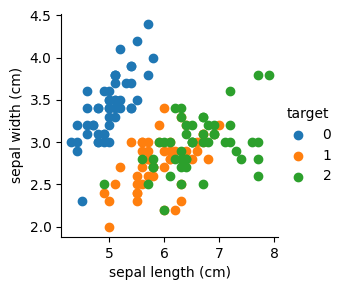

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df = X.copy()
df['target'] = y

sns.FacetGrid(df, hue='target')\
.map(plt.scatter,'sepal length (cm)','sepal width (cm)')\
.add_legend();

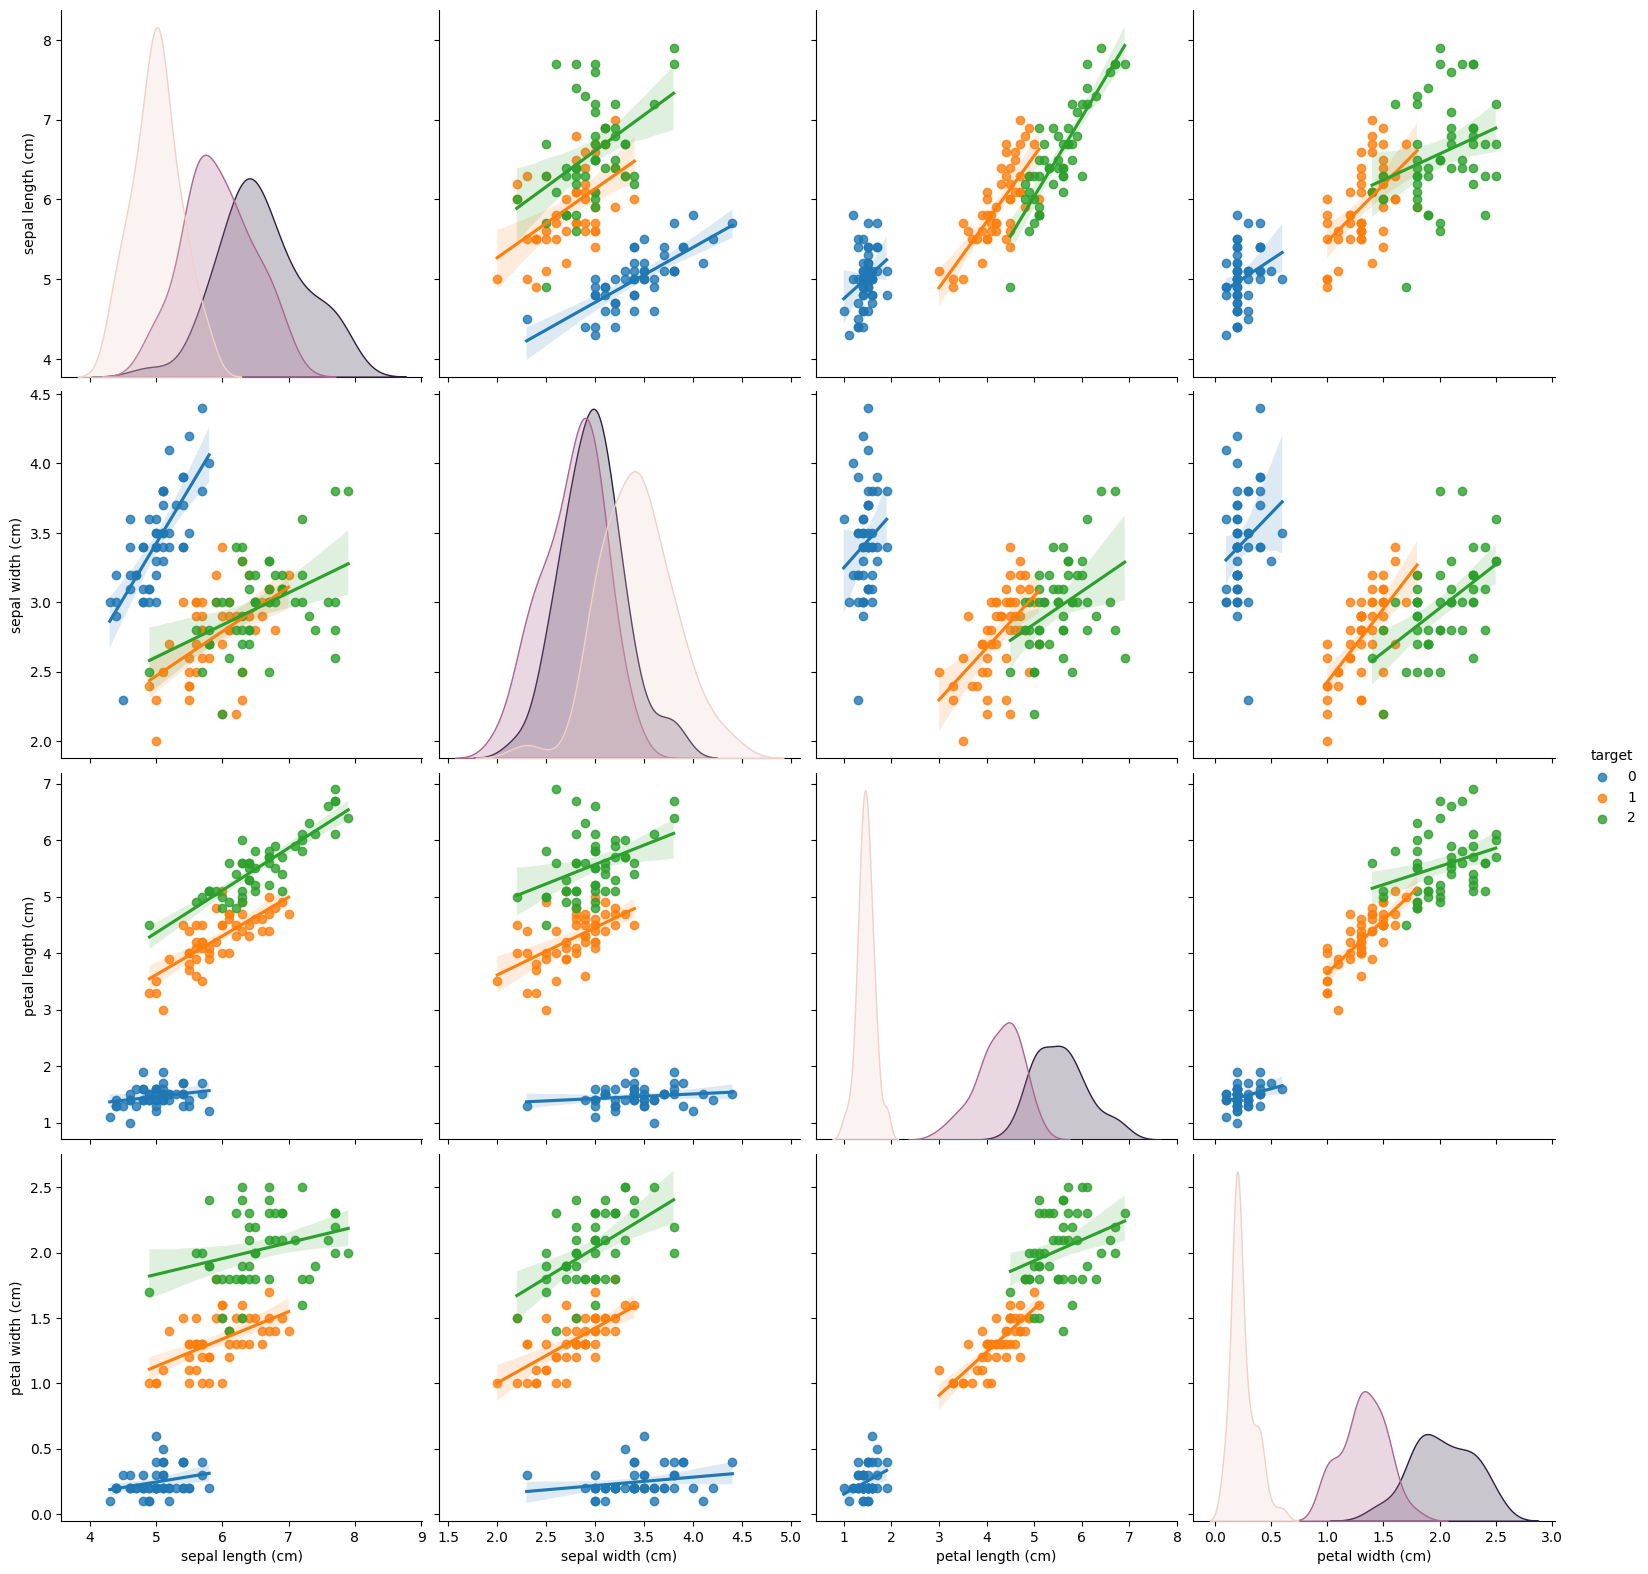

In [3]:
sns.pairplot(df,
            hue='target',
            height=4,
            kind='reg'); # "reg" de regresión lineal

Separamos el conjunto en grupos de train y test y creamos el modelo indicado.

In [4]:
from sklearn.model_selection import train_test_split

features = ['sepal length (cm)','sepal width (cm)']
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=1234)

Para ponerlo un poco más difícil en este caso vamos a seleccionar solo dos variables para construir el modelo.

In [5]:
from sklearn.linear_model import LogisticRegression

lgreg = LogisticRegression(max_iter=1000)
lgreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


La función `score` en los modelos de clasificación de scikit-learn calcula la **exactitud** (accuracy) del modelo, es decir, el porcentaje de muestras correctamente clasificadas. Se define como el número de predicciones correctas dividido por el número total de muestras evaluadas. Es una métrica útil cuando las clases están balanceadas, pero puede ser engañosa si hay clases desbalanceadas. Para obtener métricas más detalladas, se pueden usar funciones como `precision_score`, `recall_score` o `confusion_matrix`.

In [6]:
lgreg.score(X_train,y_train)

0.7888888888888889

In [7]:
lgreg.score(X_test,y_test)

0.8166666666666667

Vaya, funciona mejor en evaluación que en entrenamiento. Hemos tenido un poco de suerte. Podemos obtener todas las métricas agrupadas en un informe que se conoce como `classification_report`.

In [8]:
from sklearn.metrics import classification_report

predictions = lgreg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.57      0.70        23
           2       0.63      0.94      0.76        18

    accuracy                           0.82        60
   macro avg       0.85      0.84      0.82        60
weighted avg       0.86      0.82      0.81        60



O podemos representar la matriz de confusión.

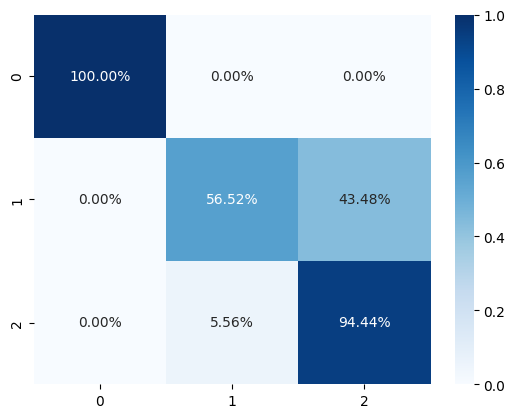

In [9]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, fmt='.2%', cmap='Blues');

Los modelos, en este caso la regresión logística, no deja den ser una fórmula que devuelve un valor numérico. Este valor numérico podemos asociarlo a la probabilidad de estar en una u otra clase. Es la forma en la que podemos hacer que una formula devuelve una etiquetado asociado a una clase. Por lo tanto, podemos pedirle al modelo que nos devuelva la probabilidad de pertenencia.

In [11]:
lgreg.predict_proba(X_test)[0]

array([0.05801171, 0.43076208, 0.51122621])

Dado que tenemos tres clases, obtenemos tres probabilidades donde podemos ver cual es la más alta y asignarla a esta, pero en algunos casos querremos establecer umbrales concretos en base a la tasa de falsos positivos y falsos negativos que cada _corte_ nos indique. Esto son consideraciones importantes cuando trabajamos con datos sumamente desbalanceados (casos de fraude o enfermedades raras).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, f1_score

X, y = make_classification(n_samples=1_000, weights=[0.1, 0.9], random_state=0) # Muestras desbalanceadas

# Convertimos la métrica F1 en score
scorer = make_scorer(f1_score, pos_label=0)

base_model = LogisticRegression()
scorer(base_model.fit(X, y), X, y)

0.8695652173913043

In [17]:
from sklearn.model_selection import TunedThresholdClassifierCV

model = TunedThresholdClassifierCV(base_model, scoring=scorer)
scorer(model.fit(X, y), X, y)

0.8867924528301887

In [18]:
model.best_threshold_

np.float64(0.3736945925007403)

# Árboles de decisión

Los árboles de decisión se basan en una separación del espacio de atributos (features) que implique la separación de muestras de distintos grupos. De este modo, son muy adaptables cubriendo relaciones lineales como no-lineales entre las variables disponibles y la variable objetivo que persigamos.

### CART

Es uno de los algoritmos más extendido, derivado de C4.5 y sucesor de [ID3](https://es.wikipedia.org/wiki/Algoritmo_ID3). Es empleado en labores de clasificación como de regresión, donde el resultado numérico se establece mediante el promediado de las muestras en un nodo terminal.

El árbol se divide en un **nodo raíz** que comprende el primer **nodo de decisión**. Toma un atributo buscando una separación entre las clases objetivo de manera que existan el menor número de elementos de una clase dada la otra. Así, conseguimos ir separando elementos hasta llegar a los **nodos terminales** donde idealmente solo dispondremos de muestras de un único tipo, siendo los nodos de decisión anteriores el camino para determinar cómo se establece la decisión del nodo terminal.

¿Cuando acaba? Bien cuando todo queda perfectamente acotado (nunca suele suceder) o bien cuando lleguemos a un nivel máximo de profundidad. La profundidad del árbol nos permite acotar el sobreajuste del modelo.

El empleo para clasificación o regresión depende en el criterio de separación. La impureza es el criterio perseguido en clasificación mientras que en regresión nos centraremos en métricas continuas como el error cuadrático promedio (MSE).

### Criterio de decisión

* **Gini**: Establece un nivel de impureza en un nodo dado. https://es.wikipedia.org/wiki/Coeficiente_de_Gini
* **Entropía**: Mide el nivel de orden o de capacidad informativa de un sistema: https://es.wikipedia.org/wiki/Entrop%C3%ADa

Tomando esto como referencia, el algoritmo decide en base a estos criterios el mejor corte para un atributo dado.

![treeiris](../../assets/images/treeiris.png)

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=1234)
tree_clf.fit(X_train, y_train)

tree_clf.score(X_train,y_train)

0.9666666666666667

In [43]:
tree_clf.get_depth()

11

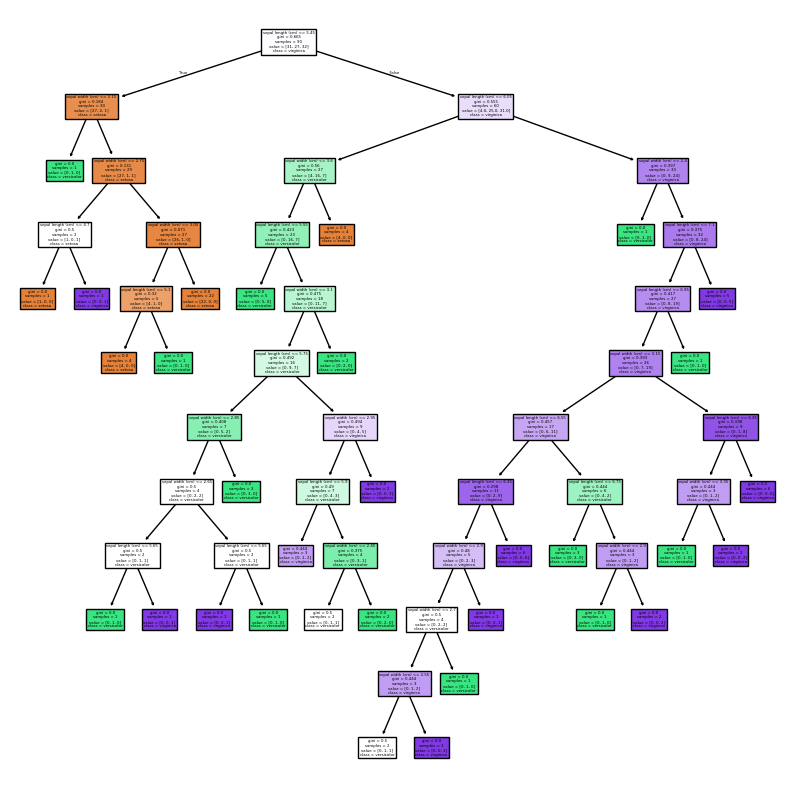

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))

plot_tree(tree_clf,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled = True);

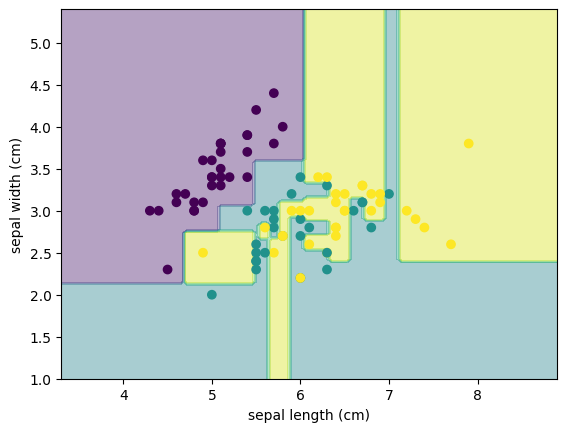

In [46]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
        tree_clf, X_train, alpha=0.4, response_method="predict"
    )
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train);

Los árboles nos permiten ver también la relevancia de las características empleadas. Cómo de importantes son a la hora de tomar una decisión. Esto hace que consideremos a los árboles de decisión modelos explicables o transparentes.

In [47]:
list(zip(tree_clf.feature_importances_, tree_clf.feature_names_in_))

[(np.float64(0.6955510796342356), 'sepal length (cm)'),
 (np.float64(0.3044489203657644), 'sepal width (cm)')]

In [48]:
# Variad la profundidad del árbol
depth = 2

tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
tree_clf.fit(X_train, y_train)

tree_clf.score(X_test,y_test)

0.7166666666666667

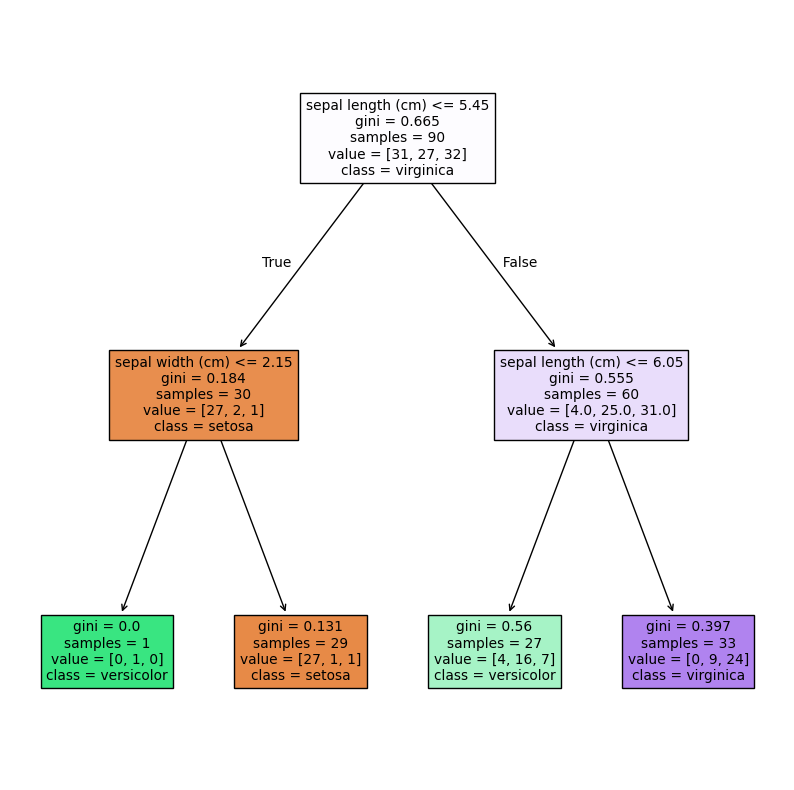

In [49]:
plt.figure(figsize=(10,10))

plot_tree(tree_clf,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled = True);

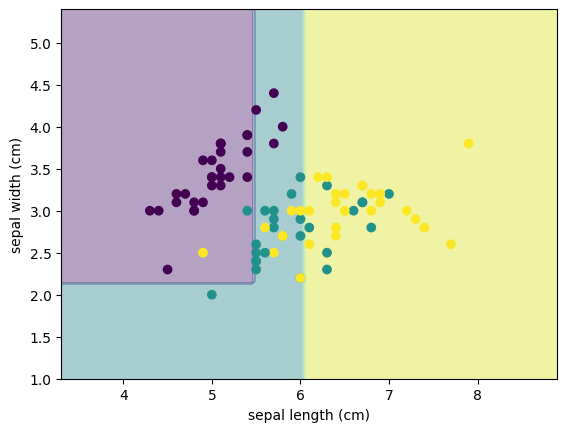

In [50]:
DecisionBoundaryDisplay.from_estimator(
        tree_clf, X_train, alpha=0.4, response_method="predict"
    )
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train);

Estos mismos modelos podemos emplearlos en modalidad de regresión, lo que básicamente asigna el promedio del valor de los nodos hoja a los nodos que caigan en cada caja terminal. Es fácil evitar el sobreajuste limitando los parámetros de profundidad, nivel de muestras mínimas para determinar qué es un nodo terminal, etc.

Además, podemos traducir estas reglas en una cadena sencilla de the `if` si necesitaramos trasladar el modelo a otro lenguaje (esto solo será válido en algunos casos).

In [51]:
import numpy as np
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {np.argmax(tree_.value[node])}")
    
    recurse(0, 0)

tree_to_code(tree_clf, features)

if sepal length (cm) <= 5.450000047683716:
  if sepal width (cm) <= 2.149999976158142:
    return 1
  else:  # if sepal width (cm) > 2.149999976158142
    return 0
else:  # if sepal length (cm) > 5.450000047683716
  if sepal length (cm) <= 6.049999952316284:
    return 1
  else:  # if sepal length (cm) > 6.049999952316284
    return 2


Más en https://scikit-learn.org/stable/modules/tree.html

## Algoritmo KNN

El algoritmo K-NN (K Nearest Neighbors) trata de buscar los K puntos más cercanos a un punto concreto para poder inferir su valor. Se trata de una clasificación basada en un voto por mayoría de los elementos cercanos (basado en su vector de atributos) de forma que si eres un vector cercano, serás parecido a mí.

### Distancia

La distancia entre vectores de atributos puede calcularse de distintas maneras aunque la distancia Euclidea suele ser la empelada habitualmente.

$$
D(p,q) = \sqrt{(p-q)^2}
$$

Aunque veremos que scikit-learn dispone de otros valores por defecto para su [KNearestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Dado que se emplean distancias entre muestras será importante que los rangos de las mismas se escalen para evitar sesgos debido al rango de los datos.

### Tamaño

Funciona bien con pocos datos y no requiere entrenamiento pero requiere guardar los datos de entrenamiento para poder inferir la clase. No supone nada sobre el conjunto de datos (ni normalidad ni na').

### Determinar K

Es un modelo muy basado en el empirismo y la prueba y error ya que no dispone de una estadística dada para determinar el valor óptimo de $K$. Un $K$ muy bajo puede generar mucho sesgo/error pero un $K$ alto un sobreajuste generalizado.

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.7666666666666667

In [53]:
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.80      0.52      0.63        23
           2       0.58      0.83      0.68        18

    accuracy                           0.77        60
   macro avg       0.79      0.79      0.77        60
weighted avg       0.80      0.77      0.76        60



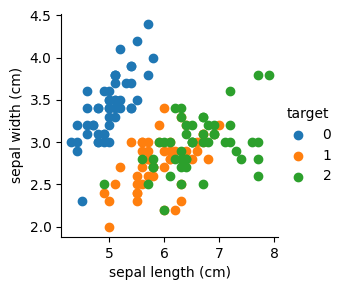

In [60]:
sns.FacetGrid(df[features + ['target']], hue='target').map(plt.scatter,features[0],features[1]).add_legend();

# Support Vector Machines

El nombre les viene del uso de vectores, planos cortantes, que separan el espacio en dos divisiones.

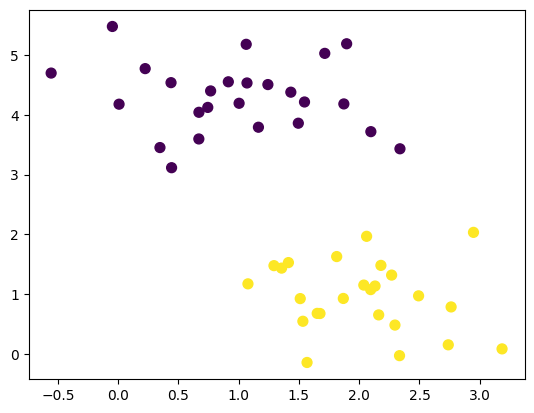

In [61]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

Podemos disponer distintas lineas que nos permitan separar el caso anterior y esto también nos sirva para catalogar nuevos ejemplos que veamos.

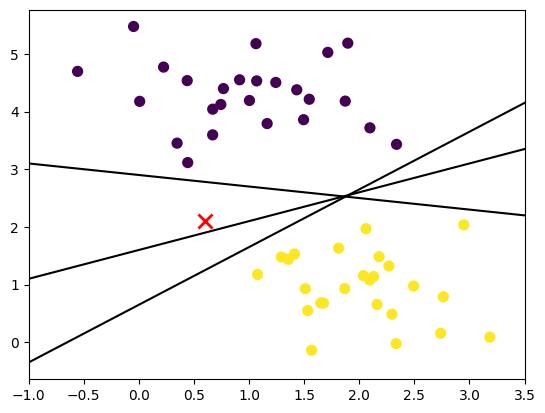

In [62]:
import numpy as np

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Los modelos basados en máquinas de vectores de soporte pretenden encontrar aquél separador que maximiza el margen de separación entre muestras.

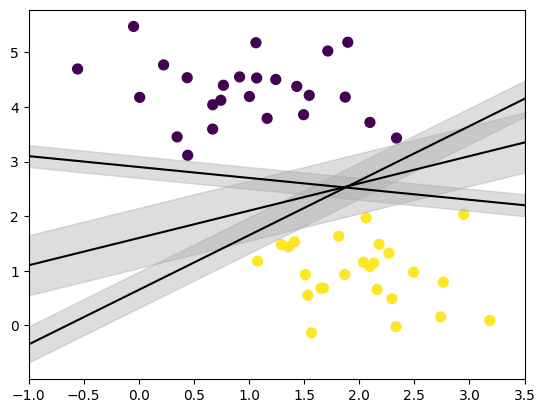

In [63]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

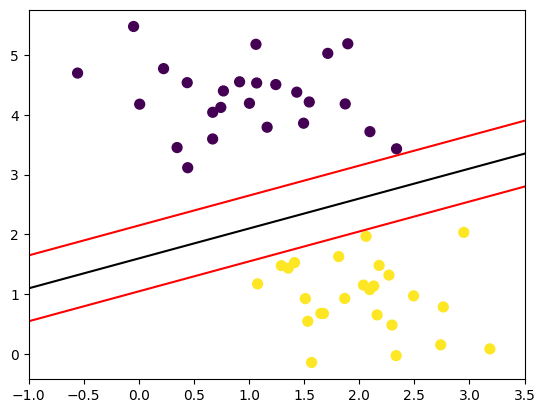

In [64]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

m, b, d = (0.5, 1.6, 0.55)
yfit = m * xfit + b
plt.plot(xfit, yfit, '-k')
plt.plot(xfit, yfit - d, '-r')
plt.plot(xfit, yfit + d, '-r')

plt.xlim(-1, 3.5);

In [66]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

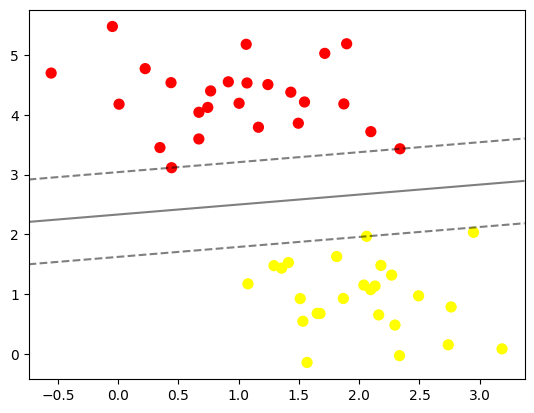

In [67]:
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel="linear", C=1E10)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

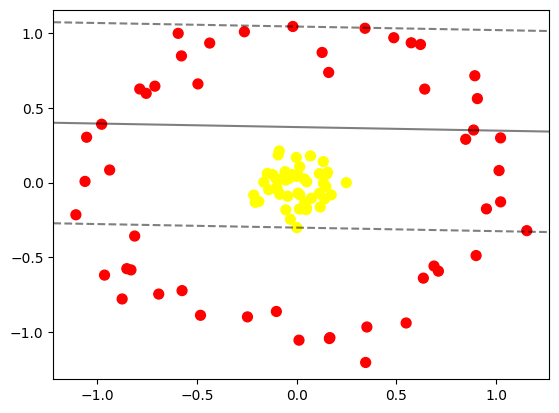

In [68]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### Kernels

No siempre los datos serán linealmente separables pero el uso de **kernels** es lo que permite realizar una traslación de los datos a un plano complejo donde estos puedan ser linealmente separables. Un **kernel** es una función matemática que permite realizar esta traslación a un plan de mayor dimensionalidad y ofrece una medida de distancia entre dos vectores.

#### Kernel trick

Precisamente gracias a esto podemos definir una transformación de los datos de modo que nuestro kernel nos arroje una distancia o métrica de similitud

$$

k(x,x') = f(x)f(x')

$$


Más sobre estos métodos: https://es.wikipedia.org/wiki/M%C3%A9todo_Kernel

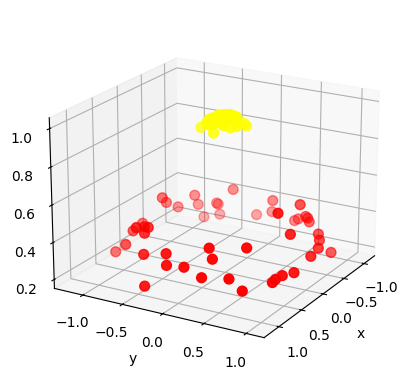

In [69]:
r = np.exp(-(X ** 2).sum(1))

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r');

In [70]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

,C,1000000.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


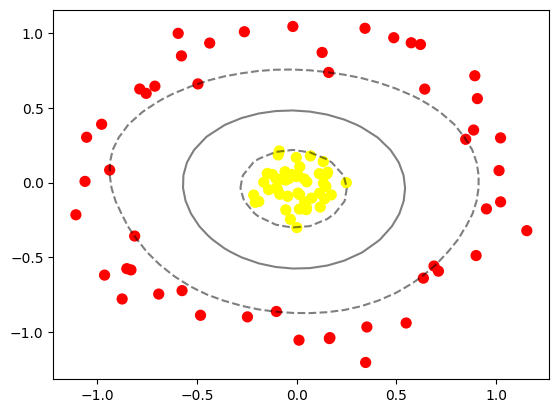

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Podéis jugar con distintas opciones para los kernels:

* `linear`: $\langle x, x' \rangle$
* `polynomial` : $\gamma (\langle x, x' \rangle - r)^d$
* `rbf`: $\exp{(-\gamma\|x - x'\|)^2}$


https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [80]:
X_train

,sepal length (cm),sepal width (cm)
39,5.1,3.4
130,7.4,2.8
113,5.7,2.5
110,6.5,3.2
21,5.1,3.7
...,...,...
143,6.8,3.2
116,6.5,3.0
53,5.5,2.3
38,4.4,3.0


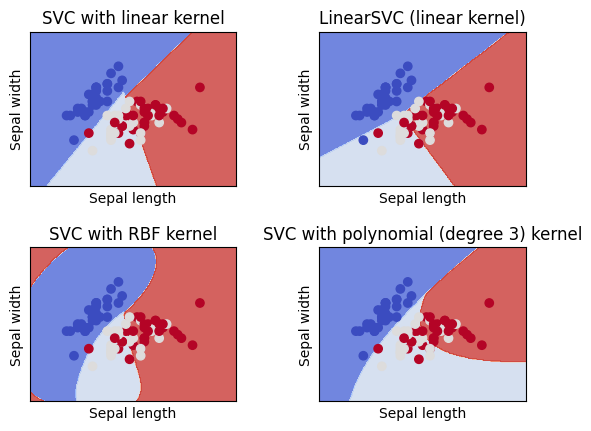

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Nos quedamos con los valores numéricos
X = X_train.to_numpy()
y = y_train.to_numpy()

# Entrenamos cuatro modelos
svc = svm.SVC(kernel='linear').fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X, y)
lin_svc = svm.LinearSVC().fit(X, y)

# Creamos la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

# Títulos
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Representamos los límites del gráfico
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Predecimos con el modelo
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Coloreamos
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [84]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
rbf_svc.score(X_train, y_train)

0.7888888888888889

In [87]:
rbf_svc.score(X_test, y_test)

0.7833333333333333

In [86]:
predictions = rbf_svc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.92      0.48      0.63        23
           2       0.61      0.94      0.74        18

    accuracy                           0.78        60
   macro avg       0.82      0.81      0.78        60
weighted avg       0.83      0.78      0.77        60



Más sobre SVMs en https://scikit-learn.org/stable/modules/svm.html

Estas cuatro familias son las más comunes en los usos generales de modelos aunque veremos que también pueden usarse de forma combinada.